<a href="https://colab.research.google.com/github/rushikeshjagatap85/Online_Retail_Customer_Segmentation_Capstone_Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Business Objective:**

***Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.***

***Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.***

***Since the marketer’s goal is usually to maximize the value (revenue and/or profit) from each customer, it is critical to know in advance how any particular marketing action will influence the customer. Ideally, such “action-centric” customer segmentation will not focus on the short-term value of a marketing action, but rather the long-term customer lifetime value (CLV) impact that such a marketing action will have. Thus, it is necessary to group, or segment, customers according to their CLV.***

***Of course, it is always easier to make assumptions and use “gut feelings” to define rules which will segment customers into logical groupings, e.g., customers who came from a particular source, who live in a particular location or who bought a particular product/service. However, these high-level categorizations will seldom lead to the desired results***.

***It is obvious that some customers will spend more than others during their relationship with a company. The best customers will spend a lot for many years. Good customers will spend modestly over a long period of time, or will spend a lot over a short period of time. Others won’t spend too much and/or won’t stick around too long.***

***The right approach to segmentation analysis is to segment customers into groups based on predictions regarding their total future value to the company, with the goal of addressing each group (or individual) in the way most likely to maximize that future, or lifetime, value.***

# **Loading Dataset and Importing Modules**

In [1]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install pandas==1.3.5

In [3]:
!pip install --target=$nb_path xlrd==2.0.1

     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


##Mount the drive and import the datset

In [4]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load the seol bike data set from drive
customer_df=pd.read_excel("/content/drive/MyDrive/Online_Retail_Customer_Segmentation_Capstone_Project/Online Retail.xlsx")

# **Understand More About The Data**

##summary of data

In [6]:
# Viewing the data of top 5 rows to take a glimps of the data
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# View the data of bottom 5 rows to take a glimps of the data
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
#Getting the shape of dataset with rows and columns
print(customer_df.shape)

(541909, 8)


In [9]:
#Getting all the columns
print("Features of the dataset:")
customer_df.columns

Features of the dataset:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
#check details about the data set
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
#print the unique value
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [12]:
#Looking for the description of the dataset to get insights of the data
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


##Features description

* ### **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
* ### **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
* ### **Description: Product (item) name. Nominal.**
* ### **Quantity: The quantities of each product (item) per transaction. Numeric.**
* ### **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated**.
* ### **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**
* ### **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**
* ### **Country: Country name. Nominal, the name of the country where each customer resides.**

# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [13]:
#check for count of missing values in each column.
customer_df.isna().sum()
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

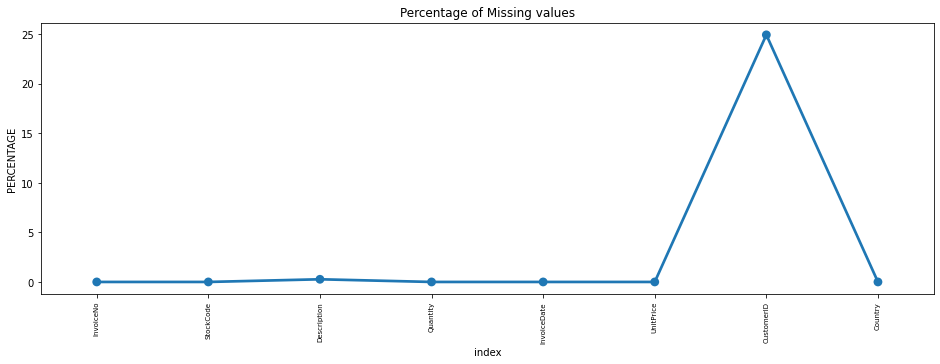

In [14]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((customer_df.isnull().sum())*100/customer_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

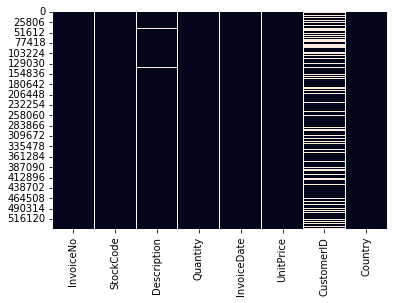

In [15]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

In [16]:
customer_df['Description'].isnull().sum()

1454

In [17]:
customer_df['CustomerID'].isnull().sum()

135080

* **There is some null value present in our dataset like in   CustomerID and  Description**

In [18]:
customer_df.dropna(inplace=True)

In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [20]:
customer_df.shape

(406829, 8)

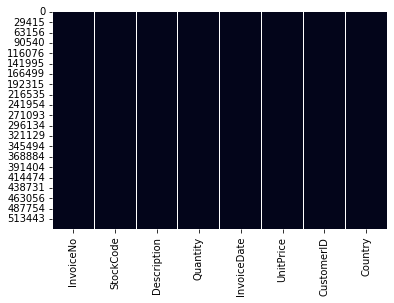

In [21]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

**After removeing null value in our dataset .it reduces to (406829, 8)**

##Duplicate values

**Why is it important to remove duplicate records from my data?** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [22]:
# Checking Duplicate Values
value=len(customer_df[customer_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  5225


In [23]:
customer_df[customer_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [24]:
### Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()
len(customer_df[customer_df.duplicated()])

0

In [25]:
customer_df.shape

(401604, 8)

### **we have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation**

In [26]:
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [27]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [28]:
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]

In [29]:
customer_df.shape

(392732, 8)

In [30]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')